# 3. Mapas (Python y R)

In [315]:
#Librerías
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from adjustText import adjust_text



In [316]:
# objects from Geopandas 

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

# FIGURA 1

## MAPA DISTRITO

In [317]:
# Upload shape file at district level

maps = gpd.read_file(r'../../data/trabajo_final/MAPAS/districts_1975_remake.shp')
maps.head(10)

,OBJECTID_1,OBJECTID,CODDD,CODPP,CODDI,DI93,PP93,DD93,DIN93,PN93,...,Shape_Leng,Shape_Area,changed_be,comments,Name,Province,Department,Depprovdis,changed,geometry
0,2,2,01,04,02,010402,0104,01,EL CENEPA,BAGUA,...,7.537574,1.842921,0,NaN,El Cenepa,Condorcanqui,Amazonas,AmazonasCondorcanquiEl Cenepa,0,"POLYGON ((-77.80805 -3.00501, -77.80726 -3.011..."
1,5,5,06,09,03,060903,0609,06,HUARANGO,SAN IGNACIO,...,2.286597,0.073869,0,NaN,Huarango,San Ignacio,Cajamarca,CajamarcaSan IgnacioHuarango,0,"POLYGON ((-78.74168 -4.63127, -78.73969 -4.630..."
2,6,6,06,09,06,060906,0609,06,SAN JOSE DE LOURDES,SAN IGNACIO,...,1.893496,0.110788,0,NaN,San Jose De Lourdes,San Ignacio,Cajamarca,CajamarcaSan IgnacioSan Jose De Lourdes,0,"POLYGON ((-79.01263 -5.01308, -79.01185 -5.012..."
3,7,7,06,09,05,060905,0609,06,NAMBALLE,SAN IGNACIO,...,1.105131,0.056485,0,NaN,Namballe,San Ignacio,Cajamarca,CajamarcaSan IgnacioNamballe,0,"POLYGON ((-79.21066 -4.96561, -79.20942 -4.964..."
4,8,8,06,09,01,060901,0609,06,SAN IGNACIO,SAN IGNACIO,...,0.755988,0.026474,0,NaN,San Ignacio,San Ignacio,Cajamarca,CajamarcaSan IgnacioSan Ignacio,0,"POLYGON ((-79.04313 -5.00236, -79.04190 -5.003..."
5,9,9,01,03,12,010312,0103,01,YAMBRASBAMBA,BONGARA,...,2.098733,0.137633,0,NaN,Yambrasbamba,Bongara,Amazonas,AmazonasBongaraYambrasbamba,0,"POLYGON ((-77.71269 -5.15866, -77.71110 -5.167..."
6,10,10,06,09,07,060907,0609,06,TABACONAS,SAN IGNACIO,...,1.473001,0.066298,0,NaN,Tabaconas,San Ignacio,Cajamarca,CajamarcaSan IgnacioTabaconas,0,"POLYGON ((-79.37334 -5.18442, -79.37258 -5.183..."
7,11,11,01,02,02,010202,0102,01,ARAMANGO,BAGUA,...,1.380697,0.061328,0,NaN,Aramango,Bagua,Amazonas,AmazonasBaguaAramango,0,"POLYGON ((-78.57349 -5.32070, -78.57355 -5.320..."
8,12,12,06,09,02,060902,0609,06,CHIRINOS,SAN IGNACIO,...,0.863222,0.028677,0,NaN,Chirinos,San Ignacio,Cajamarca,CajamarcaSan IgnacioChirinos,0,"POLYGON ((-78.89812 -5.19333, -78.89783 -5.194..."
9,13,13,06,09,04,060904,0609,06,LA COIPA,SAN IGNACIO,...,0.875266,0.034036,0,NaN,La Coipa,San Ignacio,Cajamarca,CajamarcaSan IgnacioLa Coipa,0,"POLYGON ((-78.99523 -5.25779, -78.99547 -5.260..."


In [318]:
# Polygon by each district 

maps.geometry

0       POLYGON ((-77.80805 -3.00501, -77.80726 -3.011...
1       POLYGON ((-78.74168 -4.63127, -78.73969 -4.630...
2       POLYGON ((-79.01263 -5.01308, -79.01185 -5.012...
3       POLYGON ((-79.21066 -4.96561, -79.20942 -4.964...
4       POLYGON ((-79.04313 -5.00236, -79.04190 -5.003...
                              ...                        
1671    POLYGON ((-78.28912 -5.56512, -78.28854 -5.561...
1672    POLYGON ((-79.27695 -7.24311, -79.27630 -7.240...
1673    POLYGON ((-74.93354 -12.12509, -74.92284 -12.1...
1674    POLYGON ((-76.48315 -9.74006, -76.48573 -9.741...
1675    POLYGON ((-76.17687 -7.48435, -76.21736 -7.469...
Name: geometry, Length: 1676, dtype: geometry

In [319]:
maps = maps[['DI93', 'geometry', 'Department']]
maps.rename({'DI93':'UBIGEO'}, axis =1, inplace = True )
maps 

,UBIGEO,geometry,Department
0,010402,"POLYGON ((-77.80805 -3.00501, -77.80726 -3.011...",Amazonas
1,060903,"POLYGON ((-78.74168 -4.63127, -78.73969 -4.630...",Cajamarca
2,060906,"POLYGON ((-79.01263 -5.01308, -79.01185 -5.012...",Cajamarca
3,060905,"POLYGON ((-79.21066 -4.96561, -79.20942 -4.964...",Cajamarca
4,060901,"POLYGON ((-79.04313 -5.00236, -79.04190 -5.003...",Cajamarca
...,...,...,...
1671,010702,"POLYGON ((-78.28912 -5.56512, -78.28854 -5.561...",Amazonas
1672,NaN,"POLYGON ((-79.27695 -7.24311, -79.27630 -7.240...",NaN
1673,090716,"POLYGON ((-74.93354 -12.12509, -74.92284 -12.1...",Huancavelica
1674,100306,"POLYGON ((-76.48315 -9.74006, -76.48573 -9.741...",Huanuco


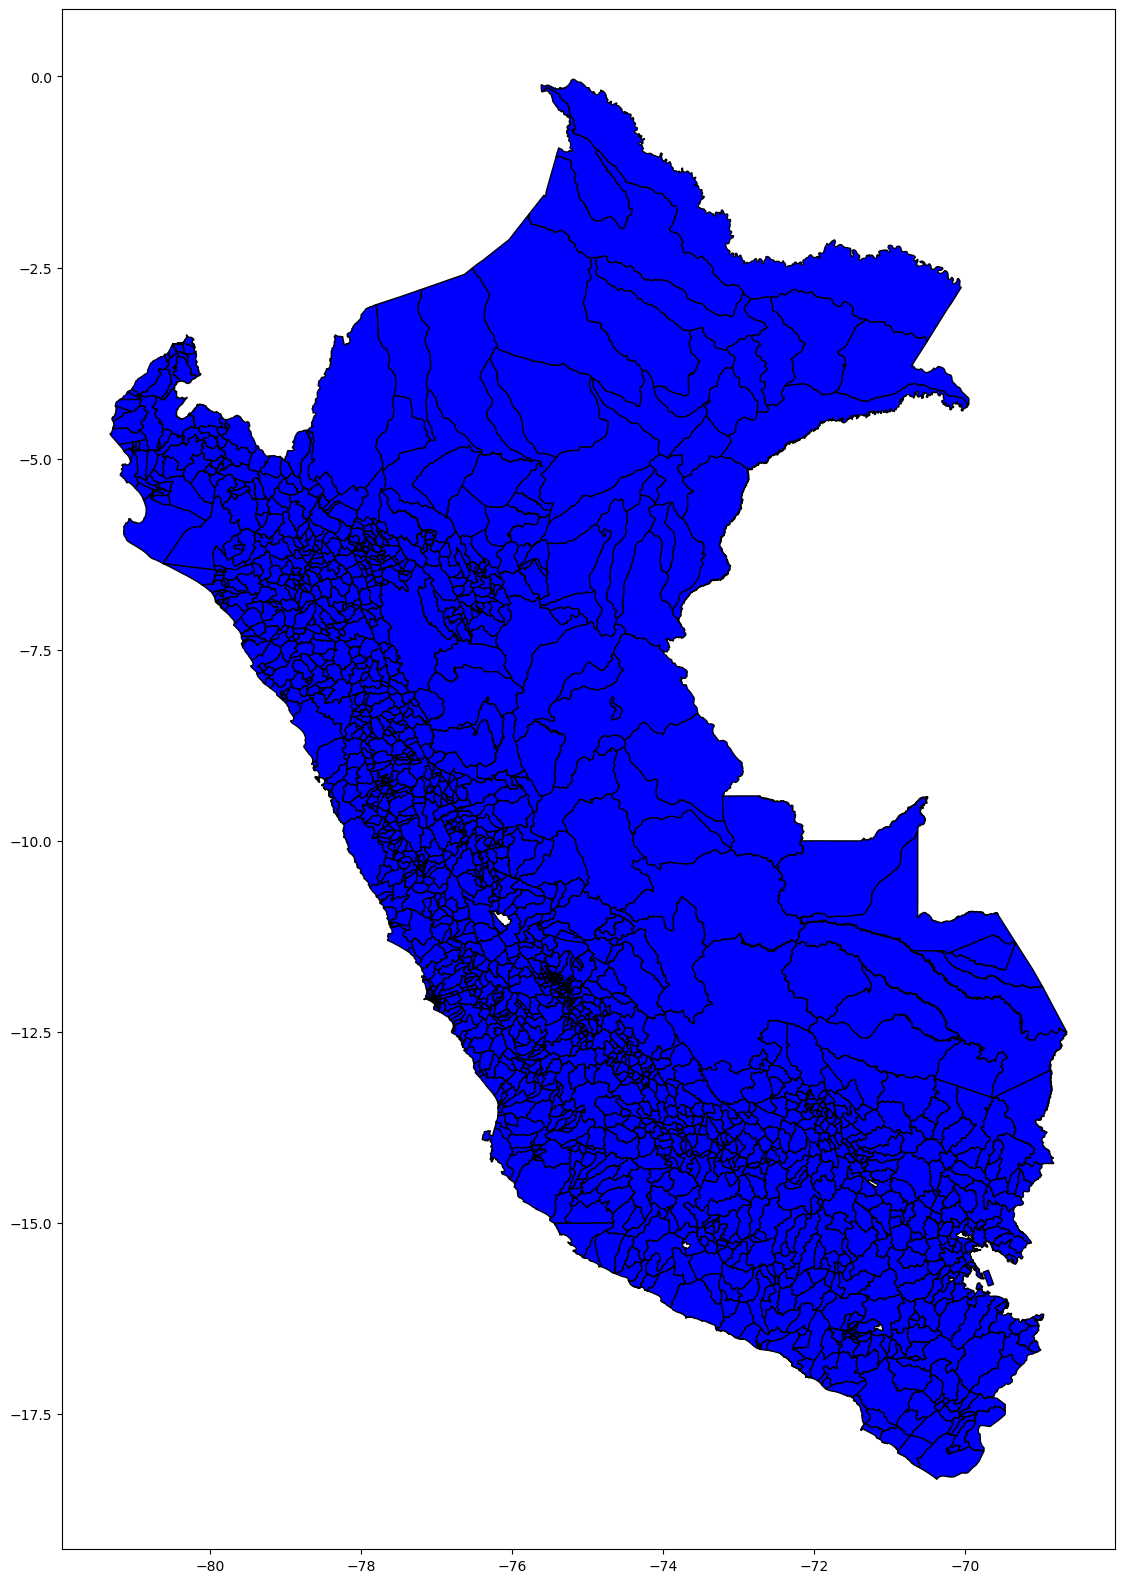

In [321]:
# Plot at district level 

fig, ax = plt.subplots(figsize=(20, 20))

maps.plot(  ax=ax, color='blue',
            edgecolor='black' )
plt.show()

## MAPA DEPARTAMENTO

In [322]:
# Upload shape file at department level

mapsDepartment = gpd.read_file(r'../../data/trabajo_final/MAPAS/department_peru.shp')
mapsDepartment

,DN93,Shape_Leng,Shape_Area,Department,Departamen,Agrozone,Prioridad,Sector,Shape_Le_1,Shape_Ar_1,Shape_Le_2,Shape_Ar_2,Shape_Le_3,Shape_Ar_3,geometry
0,AMAZONAS,7.070458,1.741381,Amazonas,AMAZONAS,2,8.0,0.0,NaN,NaN,7.070458,1.741381,1.387056e+06,3.965856e+10,"POLYGON ((190727.388 9645281.982, 190723.628 9..."
1,ANCASH,0.936313,0.042964,Ancash,ANCASH,3,4.0,8.0,NaN,NaN,0.936313,0.042964,1.224373e+06,3.513116e+10,"POLYGON ((208212.958 9109138.030, 208264.395 9..."
2,APURIMAC,1.138669,0.061892,Apurimac,APURIMAC,13,8.0,0.0,NaN,NaN,1.138669,0.061892,8.470516e+05,2.111215e+10,"POLYGON ((635796.190 8543246.088, 635944.592 8..."
3,AREQUIPA,1.196186,0.045989,Arequipa,AREQUIPA,6,8.0,0.0,NaN,NaN,1.196186,0.045989,1.845044e+06,6.331337e+10,"POLYGON ((824877.410 8379760.388, 825438.863 8..."
4,AYACUCHO,1.052149,0.057723,Ayacucho,AYACUCHO,13,1.0,7.0,NaN,NaN,1.052149,0.057723,1.828366e+06,4.353540e+10,"POLYGON ((571030.296 8654039.105, 570546.869 8..."
5,CAJAMARCA,1.478845,0.070719,Cajamarca,CAJAMARCA,2,3.0,6.0,NaN,NaN,1.478845,0.070719,1.296504e+06,3.369858e+10,"POLYGON ((89055.369 9487549.915, 89280.993 948..."
6,CALLAO,0.421636,0.006733,Callao,CALLAO,4,8.0,0.0,NaN,NaN,0.421636,0.006733,9.835443e+04,1.402629e+08,"POLYGON ((268373.549 8692378.996, 268410.449 8..."
7,CUZCO,9.165219,2.238974,Cuzco,CUSCO,11,1.0,1.0,NaN,NaN,9.165219,2.238974,2.313886e+06,7.275252e+10,"POLYGON ((722243.318 8753489.034, 722375.078 8..."
8,HUANCAVELICA,0.532324,0.011351,Huancavelica,HUANCAVELICA,13,2.0,6.0,NaN,NaN,0.532324,0.011351,1.044875e+06,2.206680e+10,"POLYGON ((546661.185 8675048.058, 546669.810 8..."
9,HUANUCO,1.747425,0.116314,Huanuco,HUANUCO,9,8.0,0.0,NaN,NaN,1.747425,0.116314,1.536277e+06,3.587726e+10,"POLYGON ((278129.438 8926633.095, 278203.196 8..."


<Axes: >

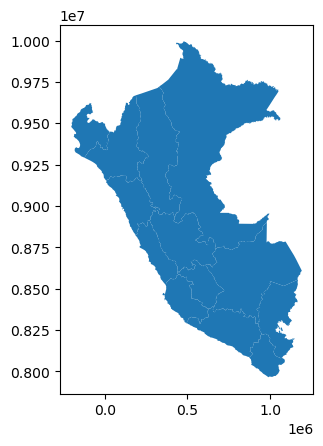

In [324]:
# Load .gdb dataset.
# AGRARIAN ZONES 

agrarianzones = gpd.read_file(r'../../data/trabajo_final/MAPAS/Figure1Geodatabase.gdb', layer='agrarian_zones_polygons'
                         )
agrarianzones.plot()

In [ ]:
agrozonecore2= gpd.read_file(r'../../data/trabajo_final/MAPAS/Figure1Geodatabase.gdb', layer='agrozone_core2_polygons'

## Construcción de la figura 1

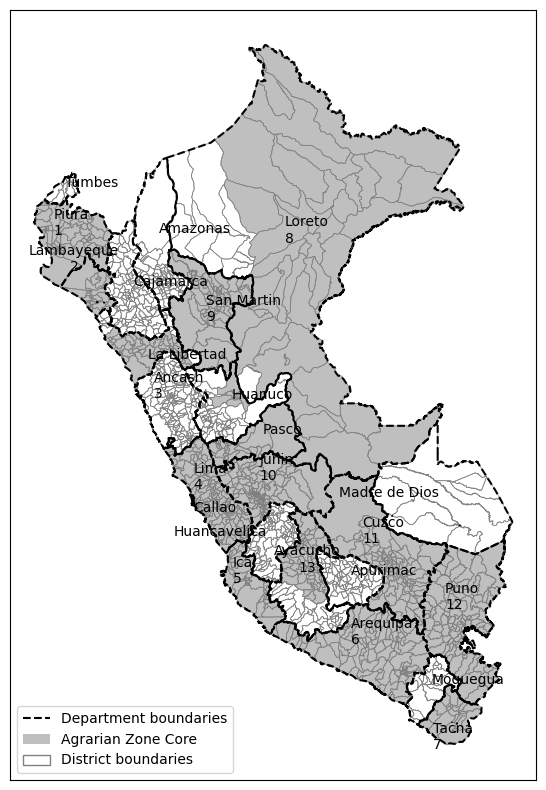

In [326]:
# Misma proyección espacial
mapsDepartment = mapsDepartment.to_crs(maps.crs)
agrozonecore2 = agrozonecore2.to_crs(maps.crs)

# Figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear la capa agrozonecore2
agrozonecore2.plot(ax=ax, color='gray', alpha=0.5)



# Plotear las líneas de los distritos
maps.boundary.plot(ax=ax, color='gray', linewidth=0.5)

# Plotear el borde de la capa mapsDepartment 
mapsDepartment.boundary.plot(ax=ax, color='black', linestyle='--')

# Crear una lista de etiquetas de los departamentos
labels = mapsDepartment['Department'].tolist()

# Detalles de la figura
texts = []
for x, y, label, agrozone in zip(mapsDepartment.geometry.centroid.x, mapsDepartment.geometry.centroid.y, labels, mapsDepartment['Agrozone']):
    if label not in ['Tumbes', 'Pasco', 'Callao', 'Amazonas', 'La Libertad', 'Cajamarca', 'Huanuco', 'Madre de Dios', 'Moquegua', 'Huancavelica', 'Apurimac']:
        text = ax.text(x-0.5, y-0.03 , f'{label}\n{agrozone}', ha='center', va='bottom', color='black', alpha=1)
        texts.append(text)
    else:
        text = ax.text(x, y, label, ha='center', va='center', color='black', alpha=1)
        texts.append(text)
# Ajustar
adjust_text(texts, ax=ax, lim=50)

# Eliminar números en los ejes
ax.set_xticks([])
ax.set_yticks([])

# Agregar la leyenda
legend_elements = [
    Line2D([], [], color='black', linestyle='--', label='Department boundaries'),
    mpatches.Patch(facecolor='gray', alpha=0.5, label='Agrarian Zone Core'),
    mpatches.Patch(facecolor='white', edgecolor='gray', label='District boundaries'),
    
]
ax.legend(handles=legend_elements, loc='lower left')


# Mostrar el mapa
plt.show()

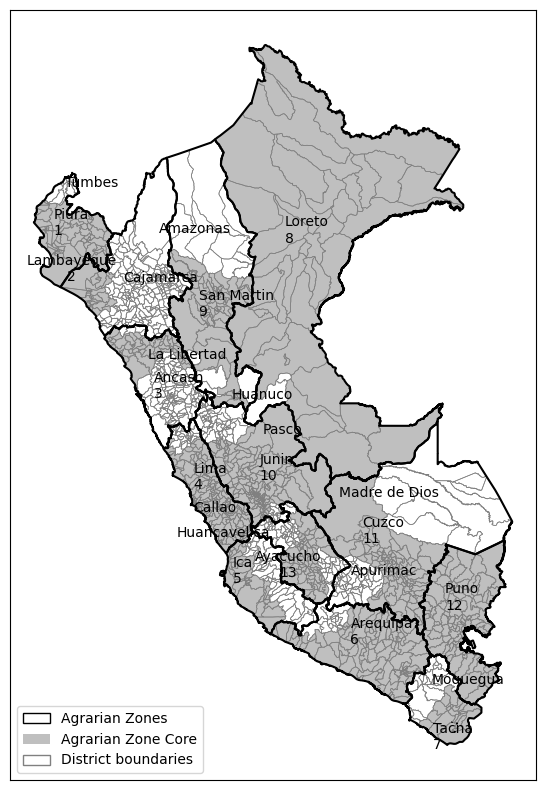

In [328]:
# Misma proyección espacial
mapsDepartment = mapsDepartment.to_crs(maps.crs)
agrozonecore2 = agrozonecore2.to_crs(maps.crs)
agrarianzones = agrarianzones.to_crs(maps.crs)

# figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear la capa agrozonecore2 
agrozonecore2.plot(ax=ax, color='gray', alpha=0.5)

# Plotear las líneas de los distritos
maps.boundary.plot(ax=ax, color='gray', linewidth=0.5)

# Plotear el borde de la capa agrarianzones 
agrarianzones.boundary.plot(ax=ax, color='black')

# Crear una lista de etiquetas de los departamentos
labels = mapsDepartment['Department'].tolist()

# Detalles
texts = []
for x, y, label, agrozone in zip(mapsDepartment.geometry.centroid.x, mapsDepartment.geometry.centroid.y, labels, mapsDepartment['Agrozone']):
    if label not in ['Tumbes', 'Pasco', 'Callao', 'Amazonas', 'La Libertad', 'Cajamarca', 'Huanuco', 'Madre de Dios', 'Moquegua', 'Huancavelica', 'Apurimac']:
        text = ax.text(x-0.5, y-0.03, f'{label}\n{agrozone}', ha='center', va='bottom', color='black', alpha=1)
        texts.append(text)
    else:
        text = ax.text(x, y, label, ha='center', va='center', color='black', alpha=1)
        texts.append(text)

# Ajustar
adjust_text(texts, ax=ax, lim=50)

# Eliminar números en los ejes
ax.set_xticks([])
ax.set_yticks([])

# Agregar la leyenda
legend_elements = [
    mpatches.Patch(facecolor='white', edgecolor='black', label='Agrarian Zones'),
    mpatches.Patch(facecolor='gray', alpha=0.5, label='Agrarian Zone Core'),
    mpatches.Patch(facecolor='white', edgecolor='gray', label='District boundaries'),
]

ax.legend(handles=legend_elements, loc='lower left')

# Mostrar el mapa
plt.show()

### Union de ambos graficos

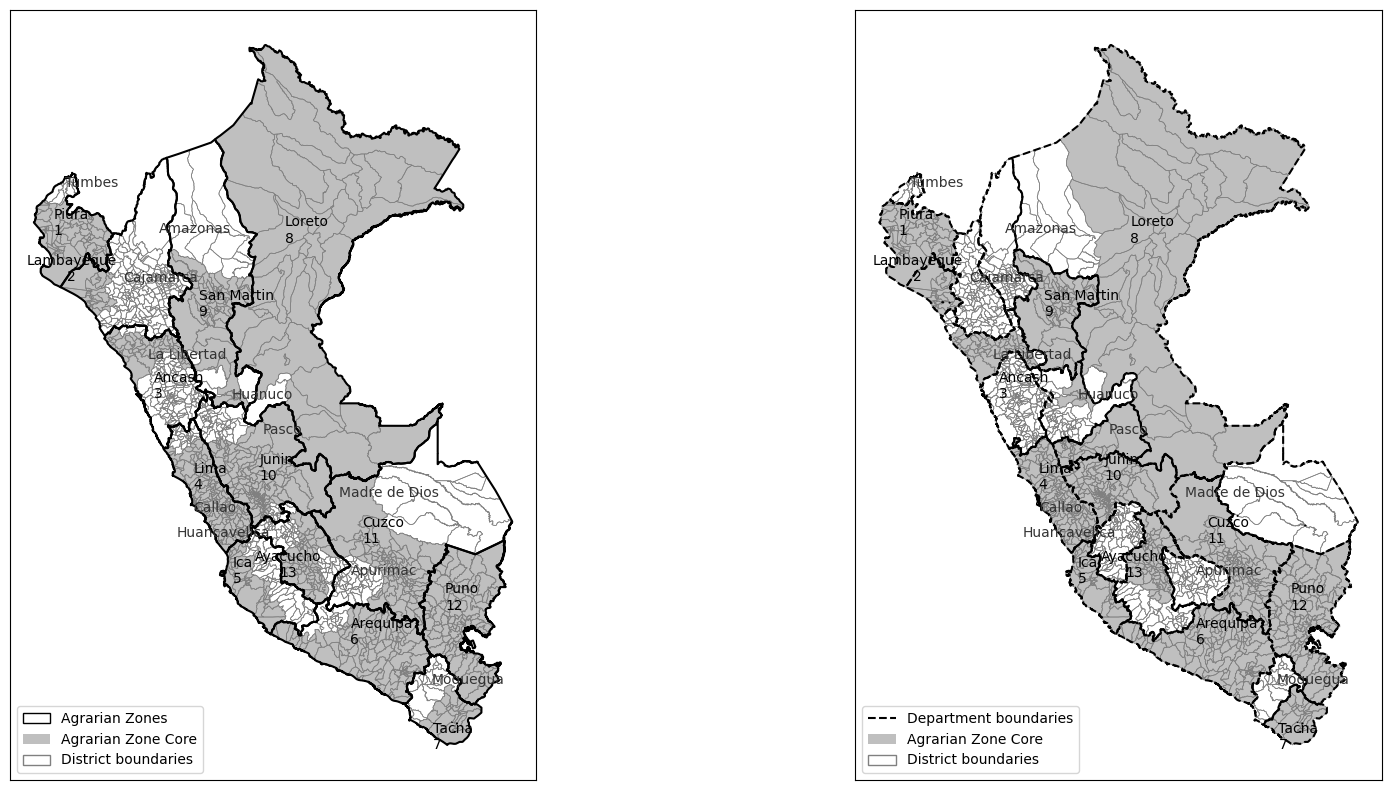

In [330]:
#Gráfico



# Misma proyección espacial
mapsDepartment_a = mapsDepartment.to_crs(maps.crs)
agrozonecore2_a = agrozonecore2.to_crs(maps.crs)
agrarianzones_a = agrarianzones.to_crs(maps.crs)

# figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))


# Misma proyección espacial
mapsDepartment_b = mapsDepartment.to_crs(maps.crs)
agrozonecore2_b = agrozonecore2.to_crs(maps.crs)

# Plotear la capa agrozonecore2 
agrozonecore2_b.plot(ax=ax2, color='gray', alpha=0.5)

# Plotear las líneas de los distritos
maps.boundary.plot(ax=ax2, color='gray', linewidth=0.5)

# Plotear el borde de la capa mapsDepartment 
mapsDepartment_b.boundary.plot(ax=ax2, color='black', linestyle='--')

# Crear una lista de etiquetas de los departamentos
labels_b = mapsDepartment_b['Department'].tolist()

# Detalles
texts_b = []
for x, y, label, agrozone in zip(mapsDepartment_b.geometry.centroid.x, mapsDepartment_b.geometry.centroid.y, labels_b, mapsDepartment_b['Agrozone']):
    if label not in ['Tumbes', 'Pasco', 'Callao', 'Amazonas', 'La Libertad', 'Cajamarca', 'Huanuco', 'Madre de Dios', 'Moquegua', 'Huancavelica', 'Apurimac']:
        text = ax2.text(x-0.5, y-0.03, f'{label}\n{agrozone}', ha='center', va='bottom', color='black', alpha=1)
        texts_b.append(text)
    else:
        text = ax2.text(x, y, label, ha='center', va='center', color='#333333', alpha=1)
        texts_b.append(text)

# Ajustar 
adjust_text(texts_b, ax=ax2, lim=50)

# Eliminar números en los ejes
ax2.set_xticks([])
ax2.set_yticks([])

# Agregar la leyenda
legend_elements_b = [
    Line2D([], [], color='black', linestyle='--', label='Department boundaries'),
    mpatches.Patch(facecolor='gray', alpha=0.5, label='Agrarian Zone Core'),
    mpatches.Patch(facecolor='white', edgecolor='gray', label='District boundaries'),
]

ax2.legend(handles=legend_elements_b, loc='lower left')

# Gráfico 



# Plotear la capa agrozonecore2 
agrozonecore2_a.plot(ax=ax1, color='gray', alpha=0.5)

# Plotear las líneas de los distritos
maps.boundary.plot(ax=ax1, color='gray', linewidth=0.5)

# Plotear el borde de la capa agrarianzones 
agrarianzones_a.boundary.plot(ax=ax1, color='black')

# Crear una lista de etiquetas de los departamentos
labels_a = mapsDepartment_a['Department'].tolist()

# Detalles
texts_a = []
for x, y, label, agrozone in zip(mapsDepartment_a.geometry.centroid.x, mapsDepartment_a.geometry.centroid.y, labels_a, mapsDepartment_a['Agrozone']):
    if label not in ['Tumbes', 'Pasco', 'Callao', 'Amazonas', 'La Libertad', 'Cajamarca', 'Huanuco', 'Madre de Dios', 'Moquegua', 'Huancavelica', 'Apurimac']:
        text = ax1.text(x-0.5, y-0.03, f'{label}\n{agrozone}', ha='center', va='bottom', color='black', alpha=1)
        texts_a.append(text)
    else:
        text = ax1.text(x, y, label, ha='center', va='center', color='#333333', alpha=1)
        texts_a.append(text)

# Ajustar 
adjust_text(texts_a, ax=ax1, lim=50)

# Eliminar números en los ejes
ax1.set_xticks([])
ax1.set_yticks([])

# Agregar la leyenda
legend_elements_a = [
    mpatches.Patch(facecolor='white', edgecolor='black', label='Agrarian Zones'),
    mpatches.Patch(facecolor='gray', alpha=0.5, label='Agrarian Zone Core'),
    mpatches.Patch(facecolor='white', edgecolor='gray', label='District boundaries'),
]

ax1.legend(handles=legend_elements_a, loc='lower left')



# Mostrar el gráfico
plt.show()

# Ruta de salida del archivo JPG
ruta_salida = r"..\..\Trabajo_final\Grupo2\figure1Python.jpg"

# Guardar la figura como JPG
fig.savefig(ruta_salida, format='jpg', dpi=300)

# Figura 2

In [336]:
# chardet permite reconocer el formato del texto dentro del archivo .csv

base = open(r'../../data/trabajo_final/MAPAS/PeruLR_1975shapedata.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [337]:
# Import csv file 


data = pd.read_csv(r'../../data/trabajo_final/MAPAS/PeruLR_1975shapedata.csv', encoding = charenc)
data.head( 5 )

,name,province,department,ubi12,mEE_DR_13_1980_pcSupM_adj,totalevents
0,Trinidad,Contumaza,Cajamarca,0,1.000000,NaN
1,Chachapoyas,Chachapoyas,Amazonas,10101,0.175866,0.0
2,Asuncion,Chachapoyas,Amazonas,10102,0.000000,0.0
3,Balsas,Chachapoyas,Amazonas,10103,0.018117,0.0
4,Cheto,Chachapoyas,Amazonas,10104,0.000000,0.0


In [338]:
# rename variable to merge later 
data.rename({'ubi12':'UBIGEO'}, axis =1 , inplace = True)
data['UBIGEO'] = data['UBIGEO'].astype(str).str.zfill(6)  # int to string y completar 6 digitos

data.head( 5 )
data

,name,province,department,UBIGEO,mEE_DR_13_1980_pcSupM_adj,totalevents
0,Trinidad,Contumaza,Cajamarca,000000,1.000000,NaN
1,Chachapoyas,Chachapoyas,Amazonas,010101,0.175866,0.0
2,Asuncion,Chachapoyas,Amazonas,010102,0.000000,0.0
3,Balsas,Chachapoyas,Amazonas,010103,0.018117,0.0
4,Cheto,Chachapoyas,Amazonas,010104,0.000000,0.0
...,...,...,...,...,...,...
1670,Raymondi,Coronel Portillo,Loreto,250201,0.000000,13.0
1671,Tahuaniya,Coronel Portillo,Loreto,250203,0.000000,1.0
1672,Yurua,Coronel Portillo,Loreto,250204,0.000000,0.0
1673,Padre Abad,Coronel Portillo,Loreto,250301,0.025927,425.0


In [339]:
# Calcular el logaritmo del porcentaje de tierras expropiadas
data['ln_porcentaje_expropiadas'] = np.log(1 + 100 * data['mEE_DR_13_1980_pcSupM_adj'])
# Calcular el logaritmo de totalevents + 0.01
data['log_totalevents'] = np.log(0.01 + data['totalevents'])
data

,name,province,department,UBIGEO,mEE_DR_13_1980_pcSupM_adj,totalevents,ln_porcentaje_expropiadas,log_totalevents
0,Trinidad,Contumaza,Cajamarca,000000,1.000000,NaN,4.615121,NaN
1,Chachapoyas,Chachapoyas,Amazonas,010101,0.175866,0.0,2.922440,-4.605170
2,Asuncion,Chachapoyas,Amazonas,010102,0.000000,0.0,0.000000,-4.605170
3,Balsas,Chachapoyas,Amazonas,010103,0.018117,0.0,1.033791,-4.605170
4,Cheto,Chachapoyas,Amazonas,010104,0.000000,0.0,0.000000,-4.605170
...,...,...,...,...,...,...,...,...
1670,Raymondi,Coronel Portillo,Loreto,250201,0.000000,13.0,0.000000,2.565718
1671,Tahuaniya,Coronel Portillo,Loreto,250203,0.000000,1.0,0.000000,0.009950
1672,Yurua,Coronel Portillo,Loreto,250204,0.000000,0.0,0.000000,-4.605170
1673,Padre Abad,Coronel Portillo,Loreto,250301,0.025927,425.0,1.278892,6.052113


In [340]:
# Merge 

dataset = pd.merge(maps, data, how="right", right_on ="UBIGEO", left_on ="UBIGEO", validate = "m:1")
dataset



,UBIGEO,geometry,Department,name,province,department,mEE_DR_13_1980_pcSupM_adj,totalevents,ln_porcentaje_expropiadas,log_totalevents
0,000000,None,NaN,Trinidad,Contumaza,Cajamarca,1.000000,NaN,4.615121,NaN
1,010101,"POLYGON ((-77.83533 -6.21034, -77.83372 -6.211...",Amazonas,Chachapoyas,Chachapoyas,Amazonas,0.175866,0.0,2.922440,-4.605170
2,010102,"POLYGON ((-77.74299 -5.94266, -77.74342 -5.943...",Amazonas,Asuncion,Chachapoyas,Amazonas,0.000000,0.0,0.000000,-4.605170
3,010103,"POLYGON ((-77.91618 -6.69285, -77.91618 -6.693...",Amazonas,Balsas,Chachapoyas,Amazonas,0.018117,0.0,1.033791,-4.605170
4,010104,"POLYGON ((-77.71535 -6.25142, -77.71349 -6.251...",Amazonas,Cheto,Chachapoyas,Amazonas,0.000000,0.0,0.000000,-4.605170
...,...,...,...,...,...,...,...,...,...,...
1673,250201,"POLYGON ((-73.29501 -10.11515, -73.29153 -10.1...",Ucayali,Raymondi,Coronel Portillo,Loreto,0.000000,13.0,0.000000,2.565718
1674,250203,"POLYGON ((-73.10922 -10.09308, -73.10916 -10.0...",Ucayali,Tahuaniya,Coronel Portillo,Loreto,0.000000,1.0,0.000000,0.009950
1675,250204,"POLYGON ((-73.20934 -9.41376, -73.09288 -9.413...",Ucayali,Yurua,Coronel Portillo,Loreto,0.000000,0.0,0.000000,-4.605170
1676,250301,"POLYGON ((-75.38538 -8.61029, -75.38456 -8.610...",Ucayali,Padre Abad,Coronel Portillo,Loreto,0.025927,425.0,1.278892,6.052113


### Construcción de gráficos

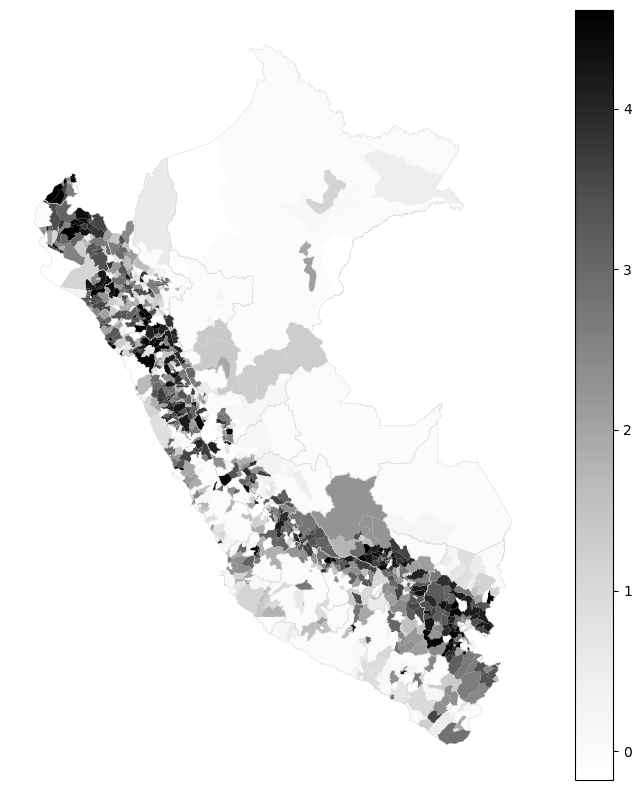

In [342]:
# misma proyección espacial
mapsDepartment = mapsDepartment.to_crs(dataset.crs)


# Crear el DataFrame para los bordes de dataset
dataset_border = gpd.GeoDataFrame(geometry=dataset.boundary)


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear dataset 
dataset.plot(column='ln_porcentaje_expropiadas', cmap='Greys', figsize=(10, 10),
                edgecolor='none', legend=True, ax=ax, vmin=-0.18)



# Plotear los bordes de dataset
dataset_border.plot(ax=ax, color='none', edgecolor='Grey', linewidth=0.5)

# Plotear los bordes de mapsDepartment 
mapsDepartment.boundary.plot(ax=ax, color='lightgrey', linewidth=0.3)

# Ajustar los ejes
ax.set_axis_off()

# Mostrar el mapa
plt.show()

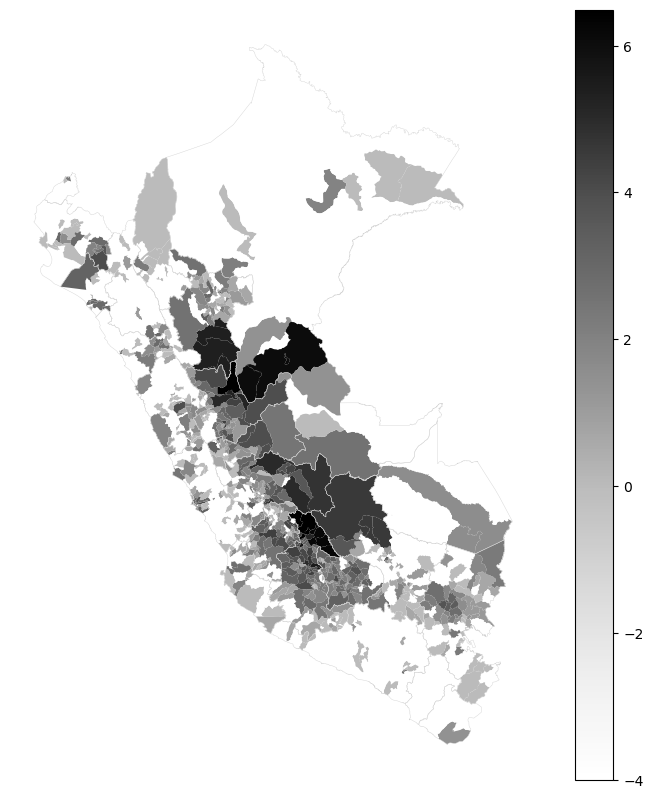

In [343]:
# misma proyección espacial
mapsDepartment = mapsDepartment.to_crs(dataset.crs)


# Crear el DataFrame 
dataset_border = gpd.GeoDataFrame(geometry=dataset.boundary)


# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Plotear dataset
dataset.plot(column='log_totalevents', cmap='Greys', figsize=(10, 10),
                edgecolor='none', legend=True, ax=ax, vmin=-4)



# Plotear los bordes de dataset
dataset_border.plot(ax=ax, color='none', edgecolor='Grey', linewidth=0.5)

# Plotear los bordes de mapsDepartment
mapsDepartment.boundary.plot(ax=ax, color='lightgrey', linewidth=0.3)

# Ajustar los ejes
ax.set_axis_off()

# Mostrar el mapa
plt.show()

### Se une los dos gráficos

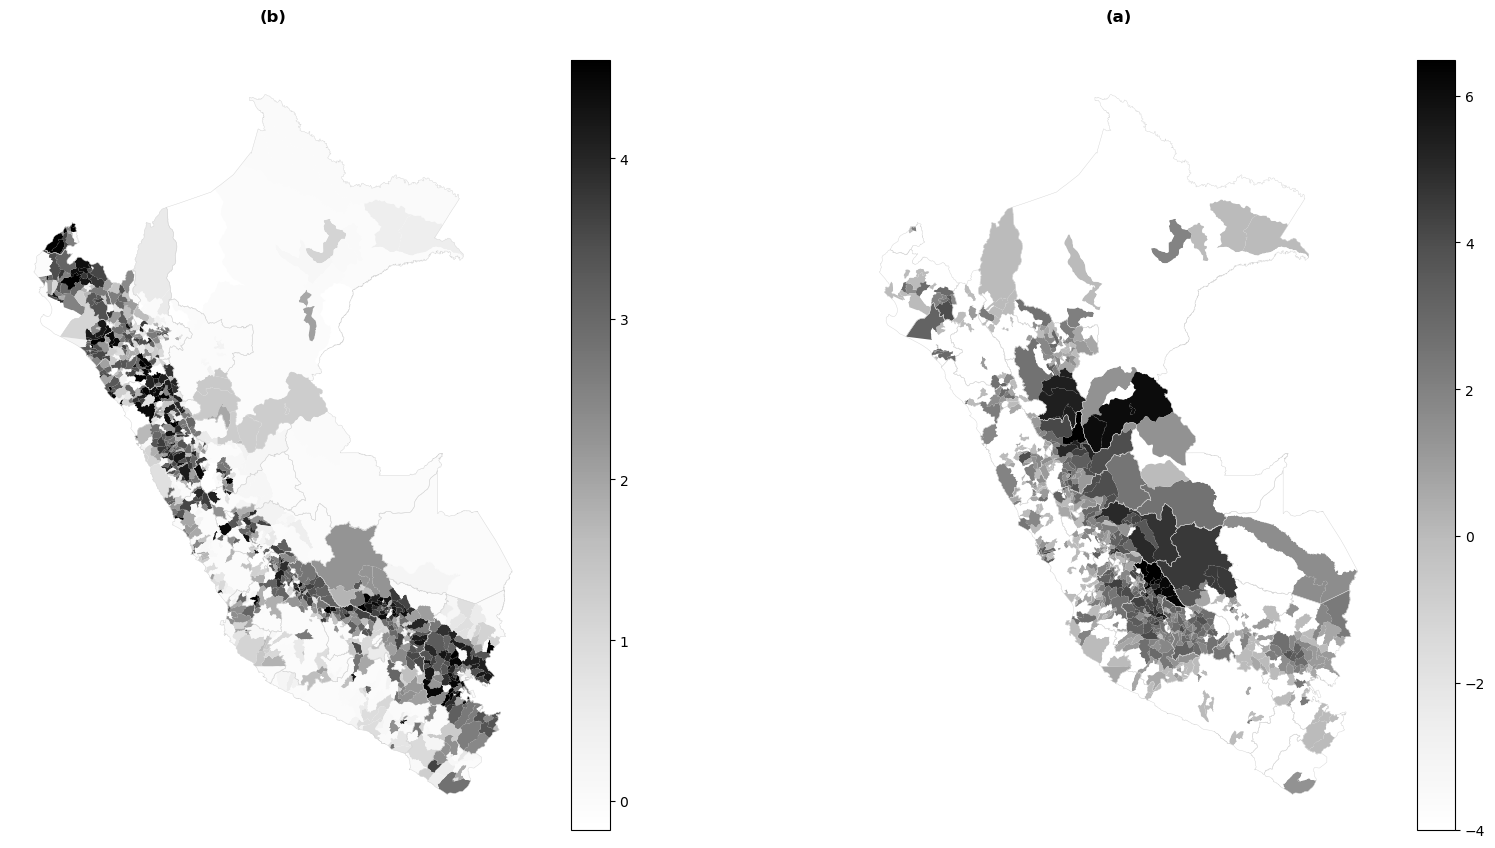

In [347]:
# Misma proyección espacial
mapsDepartment = mapsDepartment.to_crs(dataset.crs)

# Crear el DataFrame
dataset_border = gpd.GeoDataFrame(geometry=dataset.boundary)

# Crear la figura y los ejes con subfiguras
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Plotear dataset (gráfico a)
dataset.plot(column='ln_porcentaje_expropiadas', cmap='Greys', edgecolor='none', legend=True, ax=ax1, vmin=-0.18)

# Plotear los bordes de dataset
dataset_border.plot(ax=ax1, color='none', edgecolor='grey', linewidth=0.5)

# Plotear los bordes de mapsDepartment 
mapsDepartment.boundary.plot(ax=ax1, color='lightgrey', linewidth=0.3)

# Ajustar los ejes 
ax1.set_axis_off()

# Agregar la etiqueta "(a)" encima del gráfico a
ax1.text(0.5, 1.05, "(a)", transform=ax2.transAxes, fontsize=12, fontweight='bold', ha='center')


# Plotear dataset (gráfico b)
dataset.plot(column='log_totalevents', cmap='Greys', edgecolor='none', legend=True, ax=ax2, vmin=-4)

# Plotear los bordes de dataset
dataset_border.plot(ax=ax2, color='none', edgecolor='grey', linewidth=0.5)

# Plotear los bordes de mapsDepartment 
mapsDepartment.boundary.plot(ax=ax2, color='lightgrey', linewidth=0.3)

# Ajustar los ejes 
ax2.set_axis_off()

# Agregar la etiqueta "(b)" encima del gráfico b
ax2.text(0.5, 1.05, "(b)", transform=ax1.transAxes, fontsize=12, fontweight='bold', ha='center')



# Mostrar el gráfico
plt.show()

# Ruta de salida del archivo JPG
ruta_salida = r"..\..\Trabajo_final\Grupo2\figure2Python.jpg"

# Guardar la figura como JPG
fig.savefig(ruta_salida, format='jpg', dpi=300)